In [451]:
# Cargamos librerías

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [452]:
os.chdir(r'C:\Users\gonza\OneDrive\Escritorio\Bootcamp_DS\Alumno\ds_thebridge_1_22\3-Machine_Learning\Kaggle\Precio de las laptop\Datos')

train = pd.read_csv("train.csv")

# Data exploration

In [453]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


In [454]:
train.isnull().sum()

id                  0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [455]:
train.describe()

,id,Inches,Price_euros
count,912.000000,912.000000,912.000000
mean,653.076754,15.003289,1138.022478
std,378.906322,1.437009,715.342718
min,0.000000,10.100000,174.000000
25%,317.750000,14.000000,615.500000
50%,657.500000,15.600000,989.000000
75%,980.500000,15.600000,1493.350000
max,1302.000000,17.300000,6099.000000


In [456]:
train.tail()

,id,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
907,256,HP,15-BW094nd (A6-9220/8GB/128GB/W10),Notebook,15.6,1366x768,AMD A6-Series A6-9220 2.5GHz,8GB,128GB SSD,AMD Radeon R4 Graphics,Windows 10,1.91kg,445.9
908,794,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.2GHz,8GB,512GB Flash Storage,Intel HD Graphics 5300,Mac OS X,0.920kg,1165.0
909,1057,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,8GB,1TB HDD,AMD Radeon R5,Windows 10,2.4kg,449.0
910,1061,Asus,Rog G752VL-GC088D,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 965M,No OS,4kg,998.0
911,373,Lenovo,IdeaPad 110-17ACL,Notebook,17.3,1600x900,AMD A8-Series 7410 2.2GHz,4GB,128GB SSD,AMD Radeon R5,Windows 10,2.6kg,489.0


Transformaciones en columnas:
- La columna de ID no debe incluirse en el análisis
- Transformamos la columna 'TypeName'. Al haber solamente 6 tipos, haremos un pd.get_dummies
- Transformamos la columna 'Ram'
- Transformamos la columna 'Memory'
- Transformamos la columna 'ScreenResolution'
    - dividiendo las que son táctiles del resto
    - dividiendo los de high resolution del resto
- Transformamos la columna de 'OpSys'
- Tranformamos la columna de 'Weight' a integer

### Transformación de a columna 'TypeName'

In [457]:
new_type_name = pd.get_dummies(train['TypeName'])

In [458]:
train = pd.merge(train, new_type_name, left_index=True, right_index=True)

### Transformación de la columna 'Ram'

In [459]:
train.Ram.unique()

array(['8GB', '6GB', '4GB', '16GB', '24GB', '12GB', '64GB', '32GB', '2GB'],
      dtype=object)

In [460]:
import re
train['Ram'] = [re.compile('GB').sub('', x) for x in train['Ram']]
train['Ram'] = train['Ram'].astype(int)

### Tranformación de la columna 'Memory'

In [461]:
train['Memory'].unique()

array(['1TB HDD', '256GB SSD', '128GB SSD', '256GB SSD +  1TB HDD',
       '128GB SSD +  1TB HDD', '32GB Flash Storage', '500GB HDD',
       '2TB HDD', '180GB SSD', '512GB SSD', '512GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '16GB Flash Storage', '1.0TB Hybrid',
       '1TB SSD', '64GB Flash Storage', '128GB SSD +  2TB HDD',
       '128GB Flash Storage', '256GB Flash Storage',
       '64GB Flash Storage +  1TB HDD', '1TB SSD +  1TB HDD',
       '1TB HDD +  1TB HDD', '32GB SSD', '512GB SSD +  1.0TB Hybrid',
       '1.0TB HDD', '508GB Hybrid', '16GB SSD', '512GB SSD +  2TB HDD',
       '128GB HDD', '512GB SSD +  256GB SSD', '512GB Flash Storage',
       '32GB HDD', '256GB SSD +  500GB HDD', '8GB SSD'], dtype=object)

In [462]:
train['Memory'] = [re.compile('GB SSD').sub('', x) for x in train['Memory']]
train['Memory'] = [re.compile('GB HDD').sub('', x) for x in train['Memory']]
train['Memory'] = [re.compile('GB Flash Storage').sub('', x) for x in train['Memory']]
train['Memory'] = [re.compile('GB Hybrid').sub('', x) for x in train['Memory']]
train['Memory'] = [re.compile('TB HDD').sub('000', x) for x in train['Memory']]
train['Memory'] = [re.compile('TB SSD').sub('000', x) for x in train['Memory']]
train['Memory'] = [re.compile('TB Hybrid').sub('000', x) for x in train['Memory']]

train['Memory'] = train['Memory'].replace('256 +  1000', '1256')
train['Memory'] = train['Memory'].replace('128 +  1000', '1128')
train['Memory'] = train['Memory'].replace('512 +  1000', '1512')
train['Memory'] = train['Memory'].replace('256 +  2000', '2256')
train['Memory'] = train['Memory'].replace('1.0000', '1000')
train['Memory'] = train['Memory'].replace('128 +  2000', '2128')

train['Memory'] = train['Memory'].replace('64 +  1000', '1064')
train['Memory'] = train['Memory'].replace('1000 +  1000', '2000')
train['Memory'] = train['Memory'].replace('512 +  1.0000', '1512')
train['Memory'] = train['Memory'].replace('512 +  2000', '2512')
train['Memory'] = train['Memory'].replace('512 +  256', '768')
train['Memory'] = train['Memory'].replace('256 +  500', '756')
train['Memory'] = train['Memory'].astype(int)

In [463]:
train['Memory'].unique()

array([1000,  256,  128, 1256, 1128,   32,  500, 2000,  180,  512, 1512,
       2256,   16,   64, 2128, 1064,  508, 2512,  768,  756,    8])

### Transformación de la columna 'ScreenResolution'

In [464]:
# Si es táctil, creamos una nueva columna
train['Touchscreen'] = train['ScreenResolution']
train['Touchscreen'] = train['Touchscreen'].str.contains('Touchscreen')
train['Touchscreen'] = train['Touchscreen'].astype(int)

In [465]:
# Si es HD o Retina, creamos una nueva columna
train['High_resolucion'] = train['ScreenResolution']
train['High_resolucion'] = train['High_resolucion'].str.contains('HD' or 'Retina' or 'IPS')
train['High_resolucion'] = train['High_resolucion'].astype(int)

In [466]:
train['High_resolucion'].unique()

array([1, 0])

### Transformamos la columna de 'Opsys'
Muestra el sistema operativo, creamos una columna aparte con 0 y 1 para sistema operativo

In [467]:
Operative_system = pd.get_dummies(train['OpSys'])
train = pd.merge(train, Operative_system, left_index=True, right_index=True)

### Tranformación de la columna 'Weight'
Tenemos que transformarlo a 'int'

In [468]:
train['Weight'] = [re.compile('kg').sub('', x) for x in train['Weight']]
train['Weight'] = train['Weight'].astype(float)

### Transformación de la columna 'Cpu'

In [469]:
train['Cpu'].unique()

array(['Intel Core i7 7500U 2.7GHz', 'Intel Core i5 7200U 2.5GHz',
       'Intel Core i3 6006U 2GHz', 'Intel Core i7 6500U 2.5GHz',
       'AMD Ryzen 1700 3GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i7 7600U 2.8GHz', 'Intel Core i3 7100U 2.4GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i3 6100U 2.3GHz', 'AMD A10-Series 9600P 2.4GHz',
       'Intel Core i7 6600U 2.6GHz', 'Intel Core i5 6300HQ 2.3GHz',
       'Intel Core i7 7820HQ 2.9GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'Intel Core i7 6500U 2.50GHz', 'AMD FX 8800P 2.1GHz',
       'AMD A6-Series 9220 2.5GHz', 'Intel Core i7 7Y75 1.3GHz',
       'Intel Celeron Dual Core N3060 1.6GHz',
       'Intel Pentium Quad Core N3710 1.6GHz',
       'Intel Celeron Dual Core N3050 1.6GHz',
       'Intel Core i5 6200U 2.3GHz', 'Intel Core i7 6700HQ 2.6GHz',
       'Intel Core i7 7500U 2.5GHz', 'AMD A9-Series 9410 2.9GHz',
       'Intel Pentiu

In [470]:
train['Cpu power'] = train['Cpu']
train['Cpu power'] = train['Cpu power'].str[-6:-4]
train['Cpu power'] = train['Cpu power'].astype(float, errors = 'ignore')
train['Cpu power'] = pd.to_numeric(train['Cpu power'], errors='coerce')
train['Cpu power'].fillna(method='ffill', inplace=True)
train['Cpu power'].unique()

array([2. , 0. , 1. , 0.5, 0.4, 3. , 6. , 0.7, 0.9])

In [471]:
train['Intel Core i3'] = train['Cpu']
train['Intel Core i3'] = train['Intel Core i3'].str.contains('i3')
train['Intel Core i3'] = train['Intel Core i3'].astype(int)
train['Intel Core i3'].unique()

array([0, 1])

In [472]:
train['Intel Core i5'] = train['Cpu']
train['Intel Core i5'] = train['Intel Core i5'].str.contains('i5')
train['Intel Core i5'] = train['Intel Core i5'].astype(int)
train['Intel Core i5'].unique()

array([0, 1])

In [473]:
train['Intel Core i7'] = train['Cpu']
train['Intel Core i7'] = train['Intel Core i7'].str.contains('i7')
train['Intel Core i7'] = train['Intel Core i7'].astype(int)
train['Intel Core i7'].unique()

array([1, 0])

In [474]:
train['Intel Celeron Dual Core'] = train['Cpu']
train['Intel Celeron Dual Core'] = train['Intel Celeron Dual Core'].str.contains('Intel Celeron Dual Core')
train['Intel Celeron Dual Core'] = train['Intel Celeron Dual Core'].astype(int)
train['Intel Celeron Dual Core'].unique()

array([0, 1])

In [475]:
train['Intel Pentium Quad Core'] = train['Cpu']
train['Intel Pentium Quad Core'] = train['Intel Pentium Quad Core'].str.contains('Intel Pentium Quad Core')
train['Intel Pentium Quad Core'] = train['Intel Pentium Quad Core'].astype(int)
train['Intel Pentium Quad Core'].unique()

array([0, 1])

In [476]:
train['A4'] = train['Cpu']
train['A4'] = train['A4'].str.contains('A4')
train['A4'] = train['A4'].astype(int)
train['A4'].unique()

array([0, 1])

In [477]:
train['A6'] = train['Cpu']
train['A6'] = train['A6'].str.contains('A6')
train['A6'] = train['A6'].astype(int)
train['A6'].unique()

array([0, 1])

In [478]:
train['A8'] = train['Cpu']
train['A8'] = train['A8'].str.contains('A8')
train['A8'] = train['A8'].astype(int)
train['A8'].unique() 

array([0, 1])

In [479]:
train['A10'] = train['Cpu']
train['A10'] = train['A10'].str.contains('A10')
train['A10'] = train['A10'].astype(int)
train['A10'].unique() 

array([0, 1])

In [480]:
train['A12'] = train['Cpu']
train['A12'] = train['A12'].str.contains('A12')
train['A12'] = train['A12'].astype(int)
train['A12'].unique() 

array([0, 1])

### Tranformamos la columna de GPU

In [481]:
train.Gpu.unique()

array(['AMD Radeon R7 M445', 'Intel HD Graphics 620',
       'Intel HD Graphics 520', 'AMD Radeon R5 M330', 'AMD Radeon RX 580',
       'Nvidia GeForce GTX 1060', 'Intel Iris Plus Graphics 640',
       'Nvidia GeForce GTX 1050', 'Intel HD Graphics 500',
       'AMD Radeon R7 M365X', 'Intel UHD Graphics 620', 'AMD Radeon 520',
       'Nvidia GeForce 920M', 'AMD Radeon R7 M440', 'AMD Radeon RX 550',
       'Nvidia GeForce 930M', 'Nvidia GeForce GTX 960M',
       'Nvidia GeForce GTX 1050 Ti', 'Intel HD Graphics 630',
       'AMD Radeon R9 M385', 'AMD Radeon R4', 'Nvidia GeForce GTX 1070',
       'Intel HD Graphics 615', 'Intel HD Graphics 400',
       'Intel HD Graphics 405', 'Intel HD Graphics',
       'Nvidia GeForce 930MX ', 'Nvidia GeForce MX150',
       'Nvidia GeForce 150MX', 'Nvidia GeForce GTX 965M',
       'AMD Radeon R5 M315', 'Intel HD Graphics 505',
       'Nvidia GeForce 940MX', 'AMD Radeon R5', 'Nvidia GeForce GTX 980 ',
       'Nvidia GeForce 920MX', 'AMD Radeon R7 M460', '

In [482]:
train['AMD Radeon'] = train['Gpu']
train['AMD Radeon'] = train['AMD Radeon'].str.contains('AMD Radeon')
train['AMD Radeon'] = train['AMD Radeon'].astype(int)

train['Nvidia GeForce'] = train['Gpu']
train['Nvidia GeForce'] = train['Nvidia GeForce'].str.contains('Nvidia GeForce')
train['Nvidia GeForce'] = train['Nvidia GeForce'].astype(int)

train['Nvidia Quadro'] = train['Gpu']
train['Nvidia Quadro'] = train['Nvidia Quadro'].str.contains('')
train['Nvidia Quadro'] = train['Nvidia Quadro'].astype(int)

train['Intel HD Graphics'] = train['Gpu']
train['Intel HD Graphics'] = train['Intel HD Graphics'].str.contains('')
train['Intel HD Graphics'] = train['Intel HD Graphics'].astype(int)

train['AMD FirePro'] = train['Gpu']
train['AMD FirePro'] = train['AMD FirePro'].str.contains('AMD FirePro')
train['AMD FirePro'] = train['AMD FirePro'].astype(int)

train['Intel Iris Graphics'] = train['Gpu']
train['Intel Iris Graphics'] = train['Intel Iris Graphics'].str.contains('Intel Iris Graphics')
train['Intel Iris Graphics'] = train['Intel Iris Graphics'].astype(int)

# Dataset tratado:

In [483]:
pd.options.display.max_columns = None
train

,id,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Touchscreen,High_resolucion,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,Cpu power,Intel Core i3,Intel Core i5,Intel Core i7,Intel Celeron Dual Core,Intel Pentium Quad Core,A4,A6,A8,A10,A12,AMD Radeon,Nvidia GeForce,Nvidia Quadro,Intel HD Graphics,AMD FirePro,Intel Iris Graphics
0,852,Dell,Inspiron 5767,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1000,AMD Radeon R7 M445,Linux,2.83,865.0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,2.0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0
1,414,Asus,ZenBook Flip,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,Windows 10,1.27,928.0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,283,Lenovo,Ideapad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6,256,Intel HD Graphics 620,Windows 10,2.20,579.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,669,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,128,Intel HD Graphics 520,Linux,2.10,412.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,1287,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1000,AMD Radeon R5 M330,Windows 10,2.19,764.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2.0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,256,HP,15-BW094nd (A6-9220/8GB/128GB/W10),Notebook,15.6,1366x768,AMD A6-Series A6-9220 2.5GHz,8,128,AMD Radeon R4 Graphics,Windows 10,1.91,445.9,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2.0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0
908,794,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.2GHz,8,512,Intel HD Graphics 5300,Mac OS X,0.92,1165.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
909,1057,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,8,1000,AMD Radeon R5,Windows 10,2.40,449.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2.0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0
910,1061,Asus,Rog G752VL-GC088D,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1000,Nvidia GeForce GTX 965M,No OS,4.00,998.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2.0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0


In [484]:
import os
os.chdir(r'C:\Users\gonza\OneDrive\Escritorio\Bootcamp_DS\Alumno\ds_thebridge_1_22\3-Machine_Learning\Kaggle\Precio de las laptop\Datos')
train.to_csv('train_tratado.csv')

# Análisis de la correlación

C:\Users\gonza\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


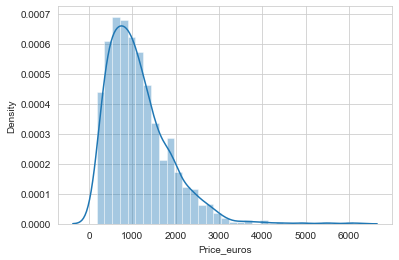

In [485]:
sns.distplot(train.Price_euros);

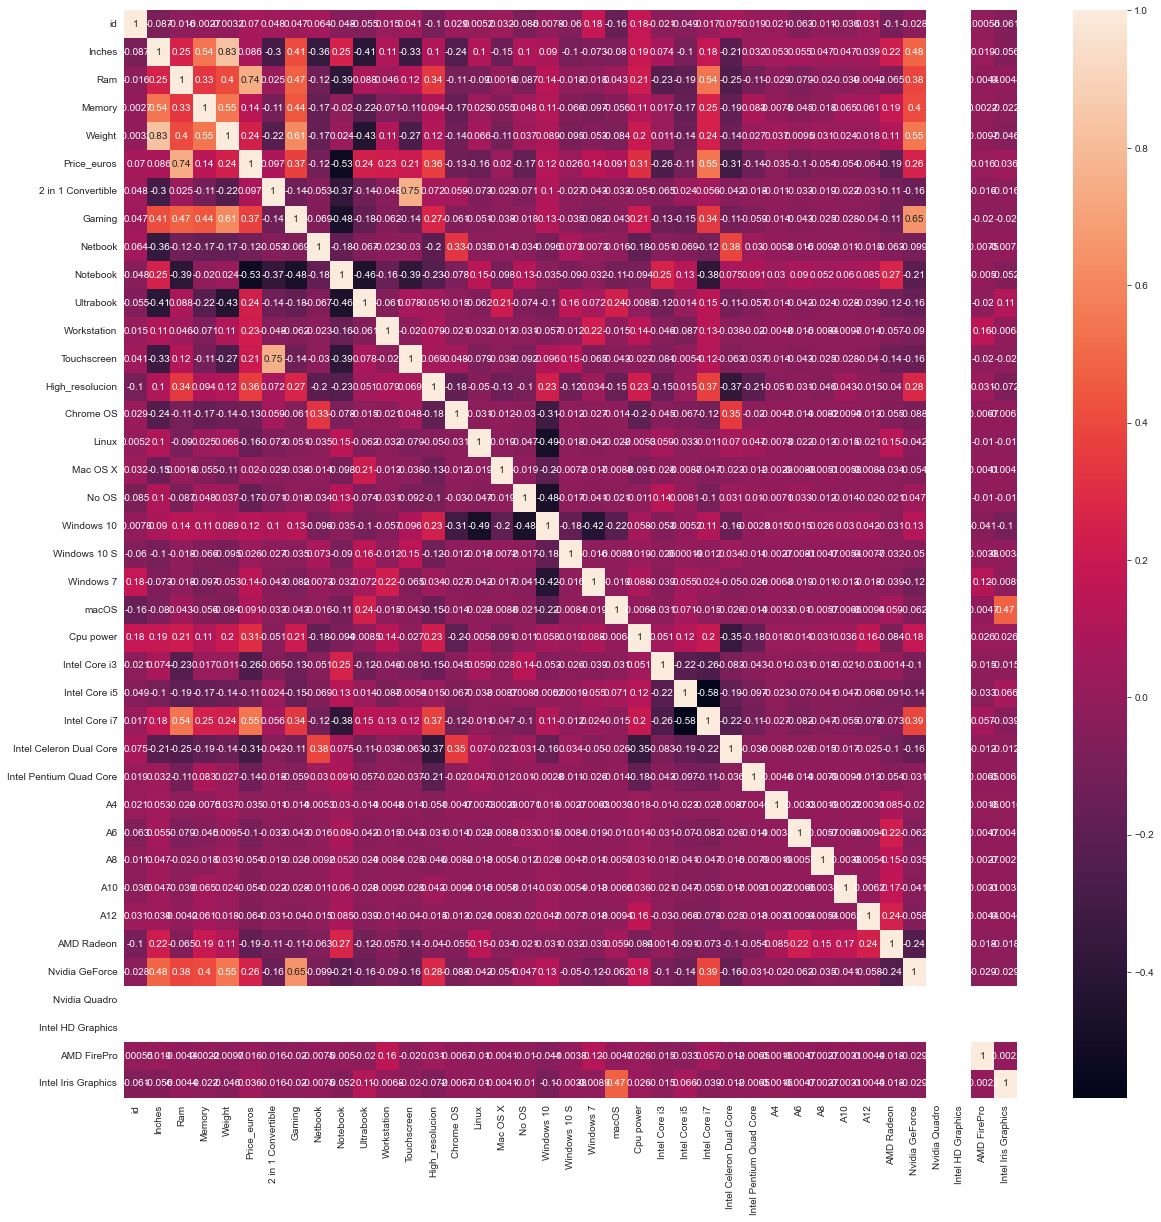

In [486]:
plt.figure(figsize=(20,20))
sns.set_style('whitegrid')
sns.heatmap(train.corr(), annot=True);

In [487]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       912 non-null    int64  
 1   Company                  912 non-null    object 
 2   Product                  912 non-null    object 
 3   TypeName                 912 non-null    object 
 4   Inches                   912 non-null    float64
 5   ScreenResolution         912 non-null    object 
 6   Cpu                      912 non-null    object 
 7   Ram                      912 non-null    int32  
 8   Memory                   912 non-null    int32  
 9   Gpu                      912 non-null    object 
 10  OpSys                    912 non-null    object 
 11  Weight                   912 non-null    float64
 12  Price_euros              912 non-null    float64
 13  2 in 1 Convertible       912 non-null    uint8  
 14  Gaming                   9

# Datos de test

In [488]:
os.chdir(r'C:\Users\gonza\OneDrive\Escritorio\Bootcamp_DS\Alumno\ds_thebridge_1_22\3-Machine_Learning\Kaggle\Precio de las laptop\Datos')

train = pd.read_csv("test.csv")

In [489]:
new_type_name = pd.get_dummies(train['TypeName'])
train = pd.merge(train, new_type_name, left_index=True, right_index=True)

In [490]:
train['Ram'] = [re.compile('GB').sub('', x) for x in train['Ram']]
train['Ram'] = train['Ram'].astype(int)

In [491]:
train['Memory'] = [re.compile('GB SSD').sub('', x) for x in train['Memory']]
train['Memory'] = [re.compile('GB HDD').sub('', x) for x in train['Memory']]
train['Memory'] = [re.compile('GB Flash Storage').sub('', x) for x in train['Memory']]
train['Memory'] = [re.compile('GB Hybrid').sub('', x) for x in train['Memory']]
train['Memory'] = [re.compile('TB HDD').sub('000', x) for x in train['Memory']]
train['Memory'] = [re.compile('TB SSD').sub('000', x) for x in train['Memory']]
train['Memory'] = [re.compile('TB Hybrid').sub('000', x) for x in train['Memory']]

train['Memory'] = train['Memory'].replace('256 +  1000', '1256')
train['Memory'] = train['Memory'].replace('128 +  1000', '1128')
train['Memory'] = train['Memory'].replace('512 +  1000', '1512')
train['Memory'] = train['Memory'].replace('256 +  2000', '2256')
train['Memory'] = train['Memory'].replace('1.0000', '1000')
train['Memory'] = train['Memory'].replace('128 +  2000', '2128')

train['Memory'] = train['Memory'].replace('64 +  1000', '1064')
train['Memory'] = train['Memory'].replace('1000 +  1000', '2000')
train['Memory'] = train['Memory'].replace('512 +  1.0000', '1512')
train['Memory'] = train['Memory'].replace('512 +  2000', '2512')
train['Memory'] = train['Memory'].replace('512 +  256', '768')
train['Memory'] = train['Memory'].replace('512 +  512', '1024')
train['Memory'] = train['Memory'].replace('256 +  1.0000', '1256')
train['Memory'] = train['Memory'].replace('256 +  256', '512')


train['Memory'] = train['Memory'].replace('256 +  500', '756')
train['Memory'] = train['Memory'].astype(int)

In [492]:
train['Touchscreen'] = train['ScreenResolution']
train['Touchscreen'] = train['Touchscreen'].str.contains('Touchscreen')
train['Touchscreen'] = train['Touchscreen'].astype(int)

In [493]:
train['High_resolucion'] = train['ScreenResolution']
train['High_resolucion'] = train['High_resolucion'].str.contains('HD' or 'Retina' or 'IPS')
train['High_resolucion'] = train['High_resolucion'].astype(int)

In [494]:
Operative_system = pd.get_dummies(train['OpSys'])
train = pd.merge(train, Operative_system, left_index=True, right_index=True)

In [495]:
train['Weight'] = [re.compile('kg').sub('', x) for x in train['Weight']]
train['Weight'] = train['Weight'].astype(float)

In [496]:
train['Cpu power'] = train['Cpu']
train['Cpu power'] = train['Cpu power'].str[-6:-4]
train['Cpu power'] = train['Cpu power'].astype(float, errors = 'ignore')
train['Cpu power'] = pd.to_numeric(train['Cpu power'], errors='coerce')
train['Cpu power'].fillna(method='ffill', inplace=True)
train['Cpu power'].unique()

array([2. , 1. , 0.4, 0. , 0.6, 6. , 3. ])

In [497]:
train['Intel Core i3'] = train['Cpu']
train['Intel Core i3'] = train['Intel Core i3'].str.contains('i3')
train['Intel Core i3'] = train['Intel Core i3'].astype(int)

train['Intel Core i5'] = train['Cpu']
train['Intel Core i5'] = train['Intel Core i5'].str.contains('i5')
train['Intel Core i5'] = train['Intel Core i5'].astype(int)

train['Intel Core i7'] = train['Cpu']
train['Intel Core i7'] = train['Intel Core i7'].str.contains('i7')
train['Intel Core i7'] = train['Intel Core i7'].astype(int)

train['Intel Celeron Dual Core'] = train['Cpu']
train['Intel Celeron Dual Core'] = train['Intel Celeron Dual Core'].str.contains('Intel Celeron Dual Core')
train['Intel Celeron Dual Core'] = train['Intel Celeron Dual Core'].astype(int)

train['Intel Pentium Quad Core'] = train['Cpu']
train['Intel Pentium Quad Core'] = train['Intel Pentium Quad Core'].str.contains('Intel Pentium Quad Core')
train['Intel Pentium Quad Core'] = train['Intel Pentium Quad Core'].astype(int)

train['A4'] = train['Cpu']
train['A4'] = train['A4'].str.contains('A4')
train['A4'] = train['A4'].astype(int)

train['A6'] = train['Cpu']
train['A6'] = train['A6'].str.contains('A6')
train['A6'] = train['A6'].astype(int)

train['A8'] = train['Cpu']
train['A8'] = train['A8'].str.contains('A8')
train['A8'] = train['A8'].astype(int)

train['A10'] = train['Cpu']
train['A10'] = train['A10'].str.contains('A10')
train['A10'] = train['A10'].astype(int)

train['A12'] = train['Cpu']
train['A12'] = train['A12'].str.contains('A12')
train['A12'] = train['A12'].astype(int)

In [498]:
train['AMD Radeon'] = train['Gpu']
train['AMD Radeon'] = train['AMD Radeon'].str.contains('AMD Radeon')
train['AMD Radeon'] = train['AMD Radeon'].astype(int)

train['Nvidia GeForce'] = train['Gpu']
train['Nvidia GeForce'] = train['Nvidia GeForce'].str.contains('Nvidia GeForce')
train['Nvidia GeForce'] = train['Nvidia GeForce'].astype(int)

train['Nvidia Quadro'] = train['Gpu']
train['Nvidia Quadro'] = train['Nvidia Quadro'].str.contains('')
train['Nvidia Quadro'] = train['Nvidia Quadro'].astype(int)

train['Intel HD Graphics'] = train['Gpu']
train['Intel HD Graphics'] = train['Intel HD Graphics'].str.contains('')
train['Intel HD Graphics'] = train['Intel HD Graphics'].astype(int)

train['AMD FirePro'] = train['Gpu']
train['AMD FirePro'] = train['AMD FirePro'].str.contains('AMD FirePro')
train['AMD FirePro'] = train['AMD FirePro'].astype(int)

train['Intel Iris Graphics'] = train['Gpu']
train['Intel Iris Graphics'] = train['Intel Iris Graphics'].str.contains('Intel Iris Graphics')
train['Intel Iris Graphics'] = train['Intel Iris Graphics'].astype(int)

In [499]:
import os
os.chdir(r'C:\Users\gonza\OneDrive\Escritorio\Bootcamp_DS\Alumno\ds_thebridge_1_22\3-Machine_Learning\Kaggle\Precio de las laptop\Datos')
train.to_csv('test_tratado.csv')

In [500]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       391 non-null    int64  
 1   Company                  391 non-null    object 
 2   Product                  391 non-null    object 
 3   TypeName                 391 non-null    object 
 4   Inches                   391 non-null    float64
 5   ScreenResolution         391 non-null    object 
 6   Cpu                      391 non-null    object 
 7   Ram                      391 non-null    int32  
 8   Memory                   391 non-null    int32  
 9   Gpu                      391 non-null    object 
 10  OpSys                    391 non-null    object 
 11  Weight                   391 non-null    float64
 12  2 in 1 Convertible       391 non-null    uint8  
 13  Gaming                   391 non-null    uint8  
 14  Netbook                  3